# Notebook to serve as example of how to use polaraveraging
### created by Mijin & Marina & the CLMM team
################################################################

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import clmm.polaraveraging as pa
import clmm.galaxycluster as gc

In [2]:
import sys
sys.path.append('./support')
import mock_data as mock

### Read in the data (here cosmoDC2)

In [3]:
cosmo_object_type = "ccl"
try:
    import pyccl
except:
    cosmo_object_type = "astropy"
    
if cosmo_object_type == "astropy":
    from astropy.cosmology import FlatLambdaCDM

elif cosmo_object_type == "ccl":
    import pyccl as ccl


In [4]:
#define random cosmology
if cosmo_object_type == "astropy":
    astropy_cosmo = FlatLambdaCDM(70., Om0 = 0.3)
    cosmo = clmm.cclify_astropy_cosmo(astropy_cosmo)
    
elif cosmo_object_type == "ccl":
    cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b = 0.05,h = 0.7,n_s = 0.97, sigma8 = 0.8, Omega_k = 0.)

## Generating cluster object with mock data

#### Preparing config for mock data generation

Mock data will include shape noise, galaxies from redshift distribution and a pdz for each galaxies

In [5]:
config={}
config['cluster_id'] = 'mock cluster'
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['ngals'] = 10000
config['Delta'] = 200
config['cosmo'] = cosmo

noisy_data_z = mock.MockData(config=config)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)

#### Loading this into a CLMM cluster object

In [6]:
# At the moment mock data only allow for a cluster centred on (0,0)
cluster_ra = 0.0
cluster_dec = 0.0
gc_object = gc.GalaxyCluster(config['cluster_id'], cluster_ra, cluster_dec, 
                             config['cluster_z'], noisy_data_z.catalog)
#gc_object.save("GC_from_mock_data.pkl")

## Load cluster object

In [7]:
#the cluster object contains properties of the lens: ra_l, dec_l, z_l and that of the sources : ra_s, dec_s, e1, e1 
#cl = gc.load_cluster("GC_from_mock_data.pkl")
cl = gc_object
print("Cluster info = ID:", cl.unique_id, "; ra:", cl.ra, "; dec:", cl.dec, "; z_l :", cl.z)
print ("The number of source galaxies is :", len(cl.galcat))

Cluster info = ID: mock cluster ; ra: 0.0 ; dec: 0.0 ; z_l : 0.3
The number of source galaxies is : 10000


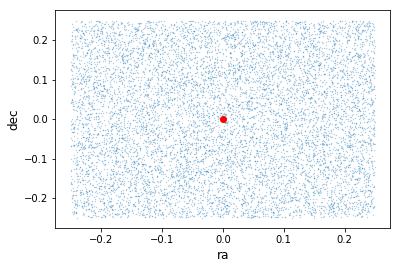

In [9]:
#plot cluster and galaxy positions
plt.scatter(cl.galcat['ra'],cl.galcat['dec'],s= 0.1, alpha=0.5)
plt.plot(cl.ra,cl.dec, 'ro')
plt.ylabel('dec', fontsize = "large")
plt.xlabel('ra',fontsize = "large");

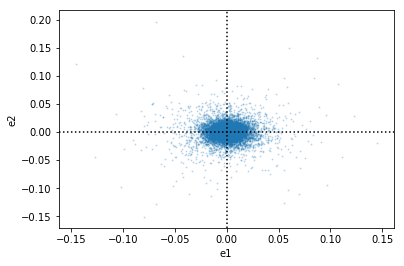

In [11]:
#check the ellipticities
fig, ax1 = plt.subplots(1,1)

ax1.scatter(cl.galcat['e1'],cl.galcat['e2'], s = 1, alpha = 0.2)
ax1.set_xlabel('e1')
ax1.set_ylabel('e2');
ax1.axvline(0, linestyle = 'dotted', color ='black')
ax1.axhline(0, linestyle = 'dotted', color ='black')

## Compute and plot shear profiles

In [12]:
# calculate angular separation and tangential shear and cross shear for each source galaxy
theta, g_t , g_x = pa.compute_shear(cl, geometry = "flat")


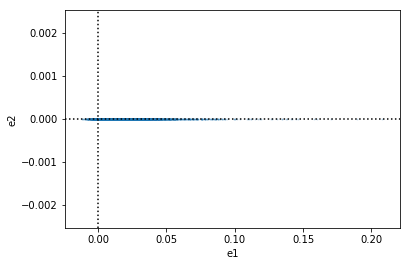

In [14]:
#check the shear, now the shear can be accessed through the cluster object
fig, ax1 = plt.subplots(1,1)

ax1.scatter(cl.galcat['gt'],cl.galcat['gx'], s = 1, alpha = 0.2) 
ax1.set_xlabel('e1')
ax1.set_ylabel('e2');
ax1.axvline(0, linestyle = 'dotted', color ='black')
ax1.axhline(0, linestyle = 'dotted', color ='black')

(array([3.130e+02, 3.672e+03, 4.017e+03, 1.197e+03, 3.870e+02, 1.910e+02,
        8.600e+01, 5.200e+01, 3.800e+01, 1.600e+01, 6.000e+00, 9.000e+00,
        3.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-0.01149155, -0.0005111 ,  0.01046935,  0.0214498 ,  0.03243025,
         0.0434107 ,  0.05439115,  0.0653716 ,  0.07635206,  0.08733251,
         0.09831296,  0.10929341,  0.12027386,  0.13125431,  0.14223476,
         0.15321521,  0.16419566,  0.17517611,  0.18615657,  0.19713702,
         0.20811747]),
 <a list of 20 Patch objects>)

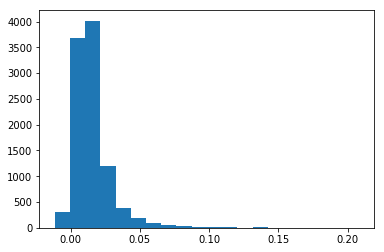

In [21]:
plt.hist(cl.galcat['gt'],bins=20)

In [15]:
#compute transversal and cross shear profiles in units defined by user, using defaults binning 
tab = pa.make_shear_profile(cl, "Mpc", bins=None, cosmo = cosmo, cosmo_object_type="ccl")

/pbs/throng/lsst/users/mricci/desc/CLMM/clmm/polaraveraging.py:431: UserWarning: maximum radius must be within range of bins
  warnings.warn("maximum radius must be within range of bins")


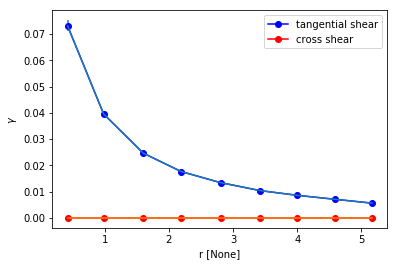

In [16]:
pa.plot_profiles(cl);

In [17]:
#define bins
new_bins = pa.make_bins(500, 5000,10) 

#compute transversal and cross shear profiles in units defined by user, using binning defined by user
new_tab = pa.make_shear_profile(cl, "kpc", bins=new_bins, cosmo = cosmo, cosmo_object_type="ccl")

#BE CAREFULL BECAUSE THIS OVERWRITE THE CLUSTER OBJECT (better implementation will be done latter)

/pbs/throng/lsst/users/mricci/desc/CLMM/clmm/polaraveraging.py:433: UserWarning: minimum radius must be within the range of bins
  warnings.warn("minimum radius must be within the range of bins")


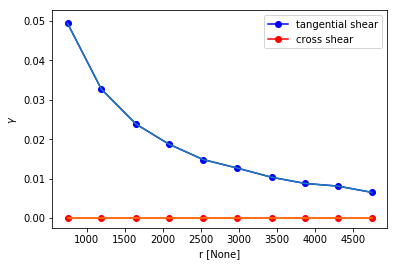

In [18]:
fig, ax = pa.plot_profiles(cl)

## You can also access the profiles quantities and play with them

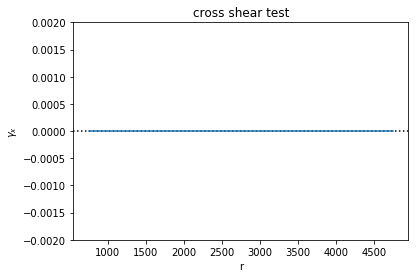

In [19]:
plt.title('cross shear test')
plt.errorbar(new_tab['radius'],new_tab['gx'],new_tab['gx_err'])
plt.title('cross shear test')
plt.ylim(-0.002,0.002)
plt.axhline(0, linestyle = 'dotted', color = 'black')
plt.xlabel("r")
plt.ylabel('$\\gamma_x$');